<a href="https://colab.research.google.com/github/rybak97/free_courses/blob/main/Data_Cleaning_BOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on: https://www.datacamp.com/tutorial/tutorial-data-cleaning-tutorial

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
excel_url = 'https://github.com/stephanie82203/Stat4601-Final-Project/raw/main/original_dataset/rollingsales_bronx.xlsx'

df = pd.read_excel(excel_url)
print("Excel file loaded successfully!")
display(df.head())

Excel file loaded successfully!


,Bronx Rolling Sales. All Sales From April 2024 - March 2025,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,PTS Sales Data as of 04/08/2025,Unnamed: 20
0,"For sales prior to the Final Roll, Neighborhoo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Note: Condominium and cooperative sales are on...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,69,NaN,A1,4447 PARK AVENUE,NaN,...,1,0,1,1668,1497,1899,1,A1,615000,2024-12-12 00:00:00


In [4]:
#we read the data in again but skill 3 rows this time
df = pd.read_excel(excel_url, skiprows = 4, header = [0])

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,69,NaN,A1,4447 PARK AVENUE,NaN,...,1.0,0.0,1.0,1668.0,1497.0,1899.0,1,A1,615000,2024-12-12
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,10,NaN,A1,2040 WASHINGTON AVENUE,NaN,...,1.0,0.0,1.0,995.0,1566.0,1899.0,1,A1,0,2024-11-04
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,27,NaN,A1,2090 WASHINGTON AVENUE,NaN,...,1.0,0.0,1.0,2356.0,2213.0,1901.0,1,A1,0,2024-06-11
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,40,NaN,A1,2073 BATHGATE AVENUE,NaN,...,1.0,0.0,1.0,1933.0,1344.0,1899.0,1,A1,425000,2024-06-27
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3047,11,NaN,A1,482 EAST 181ST STREET,NaN,...,1.0,0.0,1.0,1556.0,1240.0,1901.0,1,A1,0,2024-06-14


Inconsistent Records

In [5]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASEMENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [6]:
# Extract columns
cols = df.columns

# Create empty list for new column names
new_cols = []

# Iterate over each column name to fix issues
for column in cols:
    # Convert column name to title case
    proper_cols = column.title()
    # Replace spaces and hyphens with underscores
    proper_cols_hyphen = proper_cols.replace(" ", "_")
    clean_col = proper_cols_hyphen.replace("-", "_")
    # Append the cleaned column name to the list
    new_cols.append(clean_col)

# Display the transformed column names
new_cols

# Replace existing columns in the dataframe with the cleaned list
df.columns = new_cols

# Preview the updated dataframe
df.head()

,Borough,Neighborhood,Building_Class_Category,Tax_Class_At_Present,Block,Lot,Easement,Building_Class_At_Present,Address,Apartment_Number,...,Residential_Units,Commercial_Units,Total_Units,Land_Square_Feet,Gross_Square_Feet,Year_Built,Tax_Class_At_Time_Of_Sale,Building_Class_At_Time_Of_Sale,Sale_Price,Sale_Date
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,69,NaN,A1,4447 PARK AVENUE,NaN,...,1.0,0.0,1.0,1668.0,1497.0,1899.0,1,A1,615000,2024-12-12
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,10,NaN,A1,2040 WASHINGTON AVENUE,NaN,...,1.0,0.0,1.0,995.0,1566.0,1899.0,1,A1,0,2024-11-04
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,27,NaN,A1,2090 WASHINGTON AVENUE,NaN,...,1.0,0.0,1.0,2356.0,2213.0,1901.0,1,A1,0,2024-06-11
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,40,NaN,A1,2073 BATHGATE AVENUE,NaN,...,1.0,0.0,1.0,1933.0,1344.0,1899.0,1,A1,425000,2024-06-27
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3047,11,NaN,A1,482 EAST 181ST STREET,NaN,...,1.0,0.0,1.0,1556.0,1240.0,1901.0,1,A1,0,2024-06-14


Data types and type conversion

In [7]:
#data types
df.dtypes

,0
Borough,int64
Neighborhood,object
Building_Class_Category,object
Tax_Class_At_Present,object
Block,int64
Lot,int64
Easement,float64
Building_Class_At_Present,object
Address,object
Apartment_Number,object


In [8]:
#Fix Year_Built column
df.Year_Built = df.Year_Built.astype("str")

#Check
df.dtypes

,0
Borough,int64
Neighborhood,object
Building_Class_Category,object
Tax_Class_At_Present,object
Block,int64
Lot,int64
Easement,float64
Building_Class_At_Present,object
Address,object
Apartment_Number,object


## Missing data

There are two primary methods for dealing with missing data:

Removal of data

---


Imputation of data

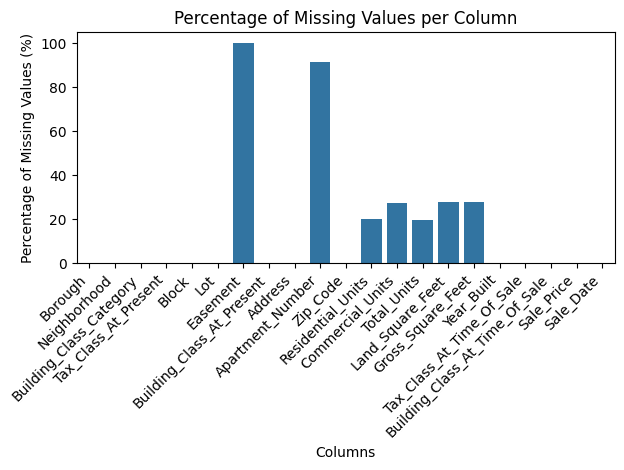

In [13]:
missing_values = df.isnull().sum()

if not missing_values.empty:
    total_rows = len(df)
    missing_percentage = (missing_values / total_rows) * 100

    sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
    plt.title('Percentage of Missing Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the DataFrame.")

In [14]:
#Get the percentage of missing values in each column
missing_pct = round(df.isnull().sum()/len(df) * 100, 1)
print(missing_pct)

Borough                             0.0
Neighborhood                        0.0
Building_Class_Category             0.0
Tax_Class_At_Present                0.0
Block                               0.0
Lot                                 0.0
Easement                          100.0
Building_Class_At_Present           0.0
Address                             0.0
Apartment_Number                   91.5
Zip_Code                            0.0
Residential_Units                  20.0
Commercial_Units                   27.5
Total_Units                        19.5
Land_Square_Feet                   28.0
Gross_Square_Feet                  28.0
Year_Built                          0.0
Tax_Class_At_Time_Of_Sale           0.0
Building_Class_At_Time_Of_Sale      0.0
Sale_Price                          0.0
Sale_Date                           0.0
dtype: float64


In [15]:
#columns with more than 30% missing values
drop_cols = missing_pct[missing_pct > 30].index
#We can drop these columns with greater than 30 percent missing values
df_new = df.drop(columns = drop_cols)

#Extract columns with mising values between 1 and 30%
replace_cols = missing_pct[(missing_pct > 0) & (missing_pct < 30)].index

#Iterate to replace missing values
for col in replace_cols:
    #if column is year built we replace with median otherwise the mean
    if col == "Year_Built":
        df_new.fillna(df_new[col].median(), inplace = True)
    else:
        mean_value = df_new[col].mean()
        df_new.fillna(mean_value, inplace = True)
df_new.isnull().sum() #preview for missing values

,0
Borough,0
Neighborhood,0
Building_Class_Category,0
Tax_Class_At_Present,0
Block,0
Lot,0
Building_Class_At_Present,0
Address,0
Zip_Code,0
Residential_Units,0


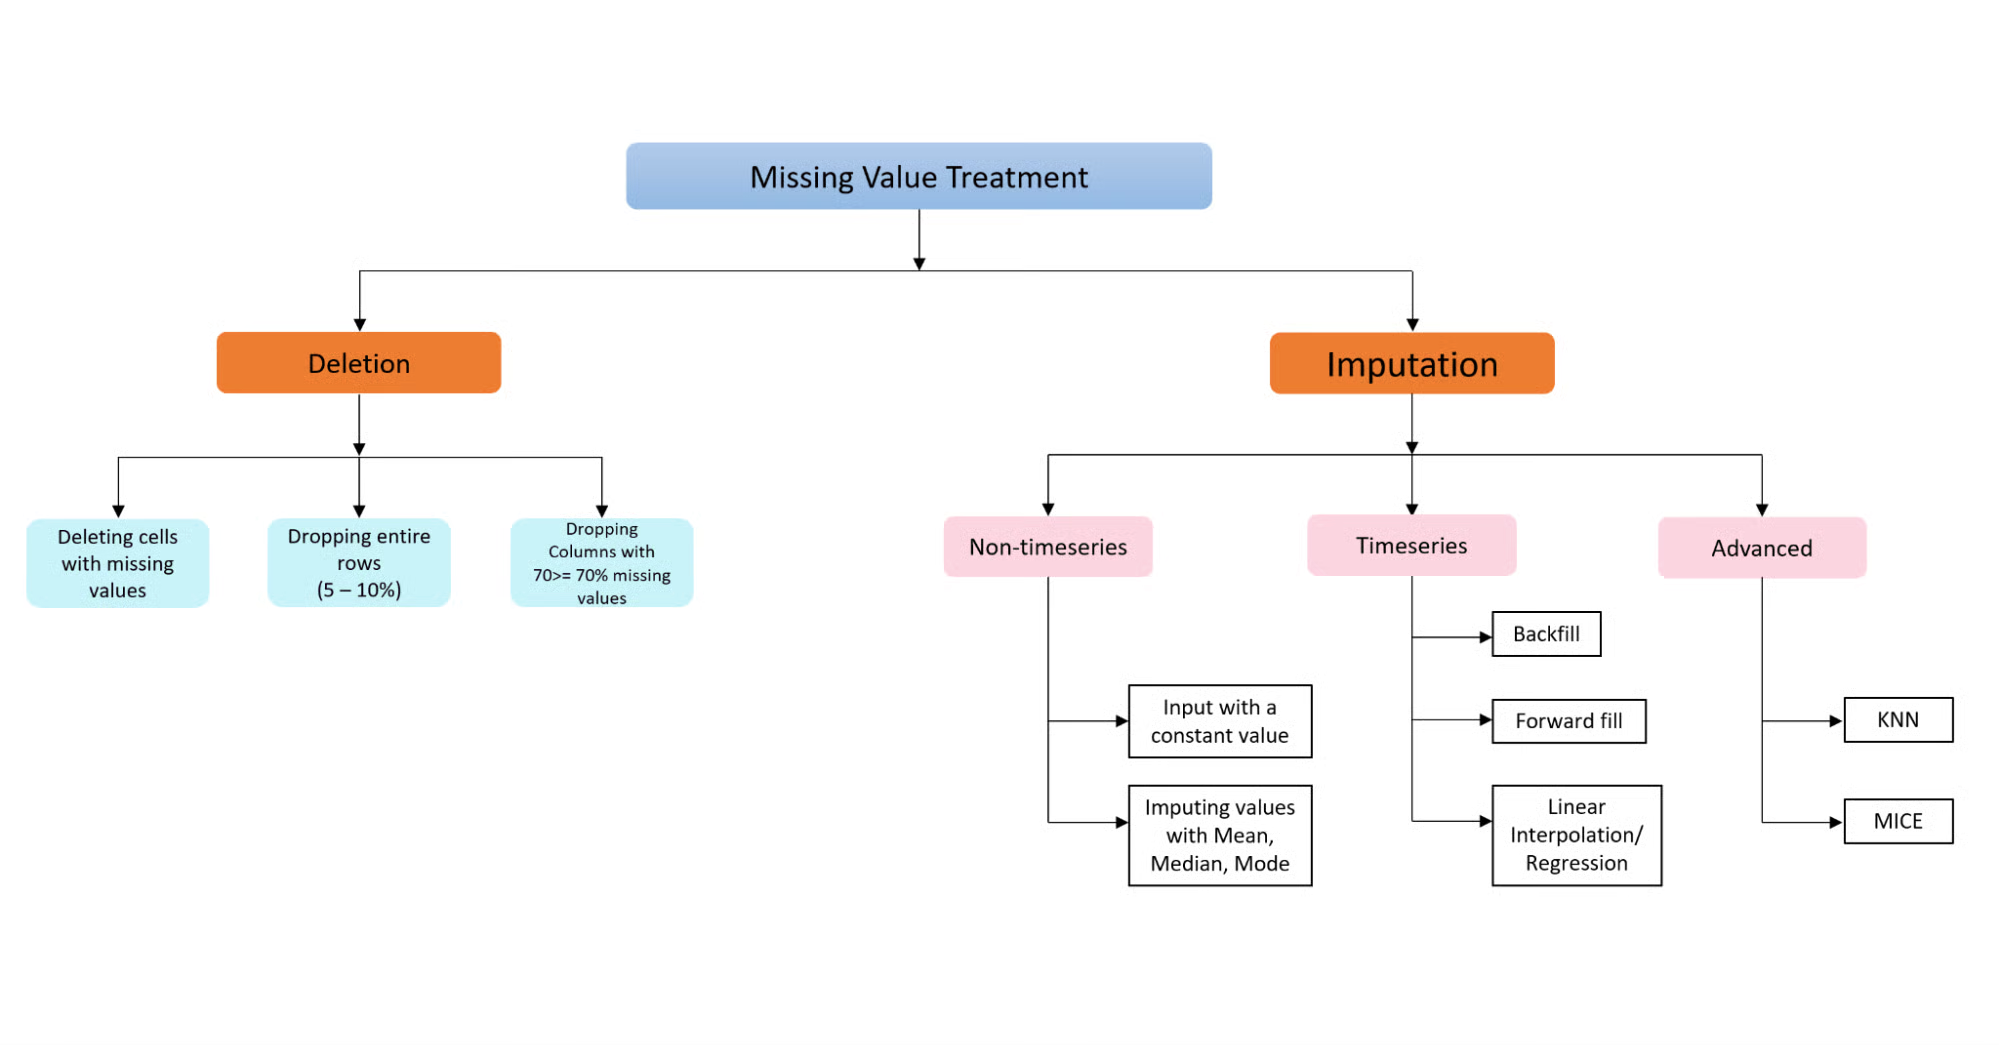

Duplicates

We must ensure that we have a single source of truth for each observation

Outliers

Outliers are extreme data points